In [6]:
import data_proc
data = data_proc.get_CIFAR10_data("./data/cifar-10-batches-py")

In [7]:
import importlib
import solver
from solver import Solver
import model
from model import ThreeLayerModel
from model import multiple_layer_model
import matplotlib.pyplot as plt    
importlib.reload(module = model)
importlib.reload(solver)


<module 'solver' from 'c:\\Users\\yinzhitao\\Desktop\\2Term3Year\\CV\\cv-pj1\\solver.py'>

### 三层神经网络测试
使用的参数如下：
- 默认正则化参数，为0.0
- 学习率，输入为1e-3
- 学习率衰减，输入为0.95
- 梯度下降方式：SGD
- 隐藏层大小为100

训练的结果被存入cache/ThreeLayerModel文件夹中。

In [32]:
m1 = ThreeLayerModel()
solver = None
s1 = Solver(model = m1, data = data,
                update_rule='sgd',
                optim_config={
                'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=10, batch_size=100,
                print_every=100,
                checkpoint_name = './cache/ThreeLayerModel/')
s1.train()

(Iteration 1 / 4900) loss: 2.300968
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_0.pkl"
(Epoch 0 / 10) train acc: 0.164000; val_acc: 0.164000
(Iteration 101 / 4900) loss: 1.789385
(Iteration 201 / 4900) loss: 1.595010
(Iteration 301 / 4900) loss: 1.539033
(Iteration 401 / 4900) loss: 1.548290
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_1.pkl"
(Epoch 1 / 10) train acc: 0.477000; val_acc: 0.441000
(Iteration 501 / 4900) loss: 1.560493
(Iteration 601 / 4900) loss: 1.667483
(Iteration 701 / 4900) loss: 1.542046
(Iteration 801 / 4900) loss: 1.532764
(Iteration 901 / 4900) loss: 1.583245
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_2.pkl"
(Epoch 2 / 10) train acc: 0.468000; val_acc: 0.460000
(Iteration 1001 / 4900) loss: 1.386633
(Iteration 1101 / 4900) loss: 1.365148
(Iteration 1201 / 4900) loss: 1.429112
(Iteration 1301 / 4900) loss: 1.408995
(Iteration 1401 / 4900) loss: 1.361214
Saving checkpoint to "./cache/ThreeLayerModel/_epoch_3.pkl"
(Epoch 3 / 10) train acc:

Text(0.5, 1.0, '三层神经网络训练损失')

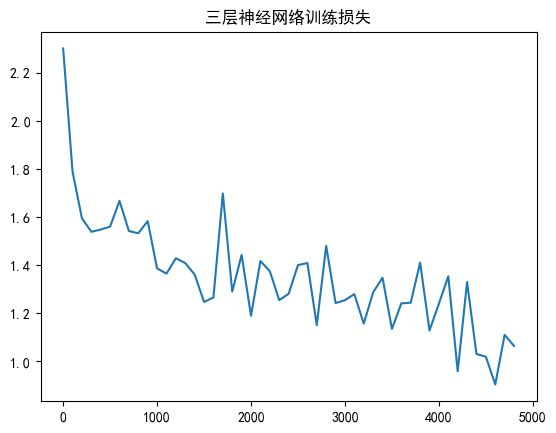

In [43]:
plt.plot([i for i in range(1,len(s1.loss_history),100)],s1.loss_history[::100])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('三层神经网络训练损失')

Text(0.5, 1.0, '三层神经网络')

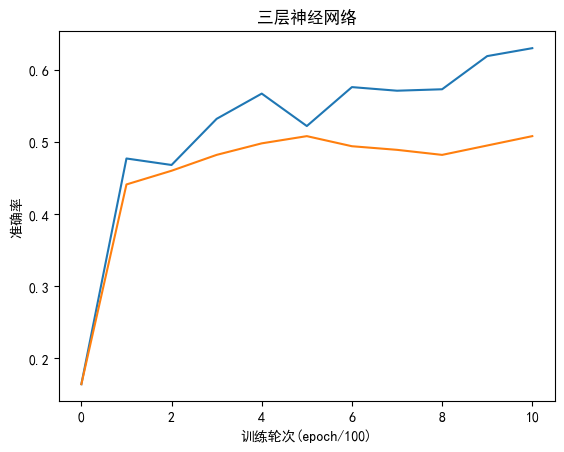

In [47]:
plt.plot(s1.train_acc_history,label = '训练集准确率')
plt.plot(s1.val_acc_history,label = '验证集准确率')
plt.xlabel('训练轮次(epoch/100)')
plt.ylabel('准确率')
plt.title('三层神经网络')

### 读取指定路径存储的模型参数，并且调用test()函数验证是否读取成功。输出的结果为在测试集上测试的准确率。

In [35]:

s3 = Solver(data = data,load_checkpoint_path='cache\ThreeLayerModel\_epoch_10.pkl')
s3.test()

Loaded checkpoint from "cache\ThreeLayerModel\_epoch_10.pkl" (epoch 10)
[Warning] 传入的data参数将被忽略，使用检查点中的数据
test dataset accuracy:0.508,test_data_size:None 


0.508

### 多重感知机的训练。除了回合数调整至20外，参数使用的与三层神经网络一致。

In [13]:
g = multiple_layer_model()
solver = None
s2 = Solver(model = g, data = data,
                update_rule='sgd',
                optim_config={
                'learning_rate': 1e-3,
                },
                lr_decay=0.95,
                num_epochs=20, batch_size=100,
                print_every=100,
                checkpoint_name = './cache/MLP/')
s2.train()

(Iteration 1 / 9800) loss: 2.302602
Saving checkpoint to "./cache/MLP/_epoch_0.pkl"
(Epoch 0 / 20) train acc: 0.118000; val_acc: 0.097000
(Iteration 101 / 9800) loss: 2.302521
(Iteration 201 / 9800) loss: 2.302348
(Iteration 301 / 9800) loss: 2.302061
(Iteration 401 / 9800) loss: 2.302094
Saving checkpoint to "./cache/MLP/_epoch_1.pkl"
(Epoch 1 / 20) train acc: 0.150000; val_acc: 0.158000
(Iteration 501 / 9800) loss: 2.301680
(Iteration 601 / 9800) loss: 2.300167
(Iteration 701 / 9800) loss: 2.296995
(Iteration 801 / 9800) loss: 2.269668
(Iteration 901 / 9800) loss: 2.200831
Saving checkpoint to "./cache/MLP/_epoch_2.pkl"
(Epoch 2 / 20) train acc: 0.187000; val_acc: 0.191000
(Iteration 1001 / 9800) loss: 2.190298
(Iteration 1101 / 9800) loss: 2.090980
(Iteration 1201 / 9800) loss: 2.085244
(Iteration 1301 / 9800) loss: 2.074829
(Iteration 1401 / 9800) loss: 2.131983
Saving checkpoint to "./cache/MLP/_epoch_3.pkl"
(Epoch 3 / 20) train acc: 0.255000; val_acc: 0.241000
(Iteration 1501 / 9

Text(0.5, 1.0, '多层神经网络')

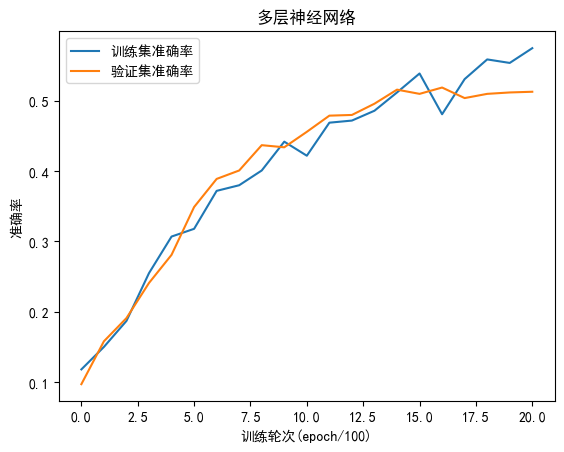

In [15]:
plt.plot(s2.train_acc_history,label = '训练集准确率')
plt.plot(s2.val_acc_history,label = '验证集准确率')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend()
plt.xlabel('训练轮次(epoch/100)')
plt.ylabel('准确率')
plt.title('多层神经网络')

Text(0.5, 1.0, 'MLP上的训练集损失')

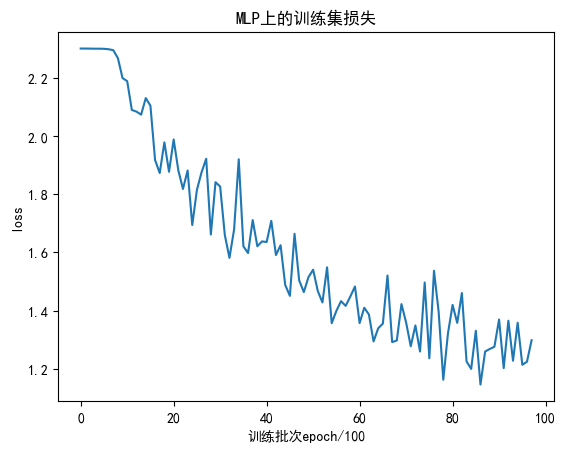

In [16]:
plt.plot(s2.loss_history[::100])
plt.xlabel('训练批次epoch/100')
plt.ylabel('loss')
plt.title('MLP上的训练集损失')

In [51]:
s4 = Solver(data = data,load_checkpoint_path='./cache/MLP/_epoch_20.pkl')
s4.test()

Loaded checkpoint from "./cache/MLP/_epoch_20.pkl" (epoch 20)
[Warning] 传入的data参数将被忽略，使用检查点中的数据
test dataset accuracy:0.501,test_data_size:None 


0.501

In [2]:
import hyperparams_find
import importlib
importlib.reload(hyperparams_find)
best_s,record = hyperparams_find.find_best_hyper_params()
best_s.checkpoint_name = './cache/best_model_3layer/'
checkpoint = best_s._save_checkpoint()

test dataset accuracy:0.516,test_data_size:None 
test dataset accuracy:0.516,test_data_size:None 
test dataset accuracy:0.516,test_data_size:None 
test dataset accuracy:0.513,test_data_size:None 
test dataset accuracy:0.513,test_data_size:None 
test dataset accuracy:0.496,test_data_size:None 
test dataset accuracy:0.496,test_data_size:None 
test dataset accuracy:0.51,test_data_size:None 
test dataset accuracy:0.51,test_data_size:None 
test dataset accuracy:0.522,test_data_size:None 
test dataset accuracy:0.522,test_data_size:None 
test dataset accuracy:0.522,test_data_size:None 
test dataset accuracy:0.503,test_data_size:None 
test dataset accuracy:0.503,test_data_size:None 
test dataset accuracy:0.532,test_data_size:None 
test dataset accuracy:0.532,test_data_size:None 
test dataset accuracy:0.532,test_data_size:None 
test dataset accuracy:0.541,test_data_size:None 
test dataset accuracy:0.541,test_data_size:None 
test dataset accuracy:0.541,test_data_size:None 
test dataset accuracy:

c:\Users\yinzhitao\Desktop\2Term3Year\CV\cv-pj1\model.py:34: RuntimeWarning: divide by zero encountered in log
  log_probs = -np.log(prob)
c:\Users\yinzhitao\Desktop\2Term3Year\CV\cv-pj1\model.py:37: RuntimeWarning: invalid value encountered in multiply
  loss = mat * log_probs
c:\Users\yinzhitao\Desktop\2Term3Year\CV\cv-pj1\model.py:33: RuntimeWarning: overflow encountered in exp
  prob = np.divide(np.exp(x),np.sum(np.exp(x),axis=1,keepdims=True))
c:\Users\yinzhitao\Desktop\2Term3Year\CV\cv-pj1\model.py:33: RuntimeWarning: invalid value encountered in divide
  prob = np.divide(np.exp(x),np.sum(np.exp(x),axis=1,keepdims=True))


test dataset accuracy:0.18,test_data_size:None 
test dataset accuracy:0.18,test_data_size:None 
test dataset accuracy:0.158,test_data_size:None 
test dataset accuracy:0.158,test_data_size:None 
test dataset accuracy:0.138,test_data_size:None 
test dataset accuracy:0.138,test_data_size:None 
test dataset accuracy:0.155,test_data_size:None 
test dataset accuracy:0.155,test_data_size:None 
test dataset accuracy:0.148,test_data_size:None 
test dataset accuracy:0.148,test_data_size:None 
test dataset accuracy:0.17,test_data_size:None 
test dataset accuracy:0.17,test_data_size:None 
test dataset accuracy:0.143,test_data_size:None 
test dataset accuracy:0.143,test_data_size:None 
test dataset accuracy:0.099,test_data_size:None 
test dataset accuracy:0.099,test_data_size:None 
test dataset accuracy:0.169,test_data_size:None 
test dataset accuracy:0.169,test_data_size:None 
test dataset accuracy:0.143,test_data_size:None 
test dataset accuracy:0.143,test_data_size:None 
test dataset accuracy:0.

### - checkpoint : 记录了best_s中所有需要存储的参数。
### - record ： 记录了不同参数对应的测试集准确率。

record是一个字典，存储方式如下：{(lr,lr_decay,hidden_size,reg) : accuracy}

In [17]:
for k,v in record.items():
    print(f'''learning rate:{k[0]},learning rate decay:{k[1]},
          size of hidden layer:{k[2]}, regulartion value:{k[3]},
          accuracy on test data:{v}
          ''')

learning rate:0.001,learning rate decay:0.9,
          size of hidden layer:64, regulartion value:0.001,
          accuracy on test data:0.516
          
learning rate:0.001,learning rate decay:0.9,
          size of hidden layer:64, regulartion value:0.0001,
          accuracy on test data:0.513
          
learning rate:0.001,learning rate decay:0.9,
          size of hidden layer:64, regulartion value:1e-05,
          accuracy on test data:0.496
          
learning rate:0.001,learning rate decay:0.9,
          size of hidden layer:100, regulartion value:0.001,
          accuracy on test data:0.51
          
learning rate:0.001,learning rate decay:0.9,
          size of hidden layer:100, regulartion value:0.0001,
          accuracy on test data:0.522
          
learning rate:0.001,learning rate decay:0.9,
          size of hidden layer:100, regulartion value:1e-05,
          accuracy on test data:0.503
          
learning rate:0.001,learning rate decay:0.9,
          size of hidden la

## 不同超参数的可视化分析

In [2]:
import pandas as pd

data = {
    "lr": [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 
           0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
           0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
           0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
           0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
           0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
           0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
           0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
           0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005],
    "lr_decay": [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
                 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
                 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
                 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
                 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
                 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
                 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
                 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
                 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99],
    "hidden_size": [64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256,
                    64, 64, 64, 100, 100, 100, 256, 256, 256],
    "reg": [0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05,
            0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05, 0.001, 0.0001, 1e-05],
    "test_accuracy": [0.516, 0.513, 0.496, 0.51, 0.522, 0.503, 0.532, 0.541, 0.532,
                      0.501, 0.513, 0.499, 0.496, 0.525, 0.502, 0.517, 0.507, 0.507,
                      0.489, 0.504, 0.489, 0.473, 0.49, 0.489, 0.5, 0.51, 0.516,
                      0.18, 0.158, 0.138, 0.155, 0.148, 0.17, 0.143, 0.099, 0.169,
                      0.143, 0.16, 0.173, 0.156, 0.198, 0.192, 0.192, 0.167, 0.143,
                      0.184, 0.151, 0.108, 0.191, 0.164, 0.147, 0.173, 0.204, 0.171,
                      0.19, 0.168, 0.184, 0.203, 0.21, 0.157, 0.151, 0.212, 0.154,
                      0.112, 0.173, 0.159, 0.185, 0.167, 0.186, 0.222, 0.156, 0.175,
                      0.152, 0.137, 0.195, 0.161, 0.159, 0.156, 0.16, 0.167, 0.195]
}

df = pd.DataFrame(data)

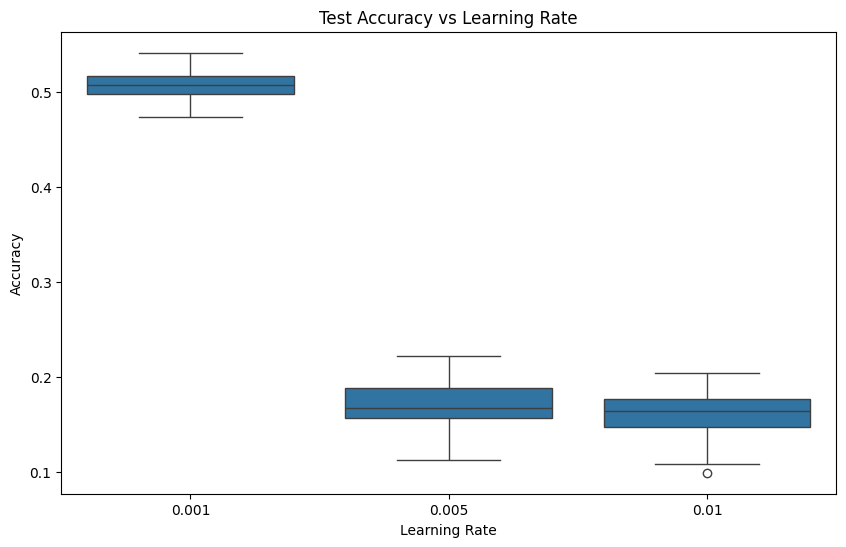

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='lr', y='test_accuracy', data=df)
plt.title("Test Accuracy vs Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

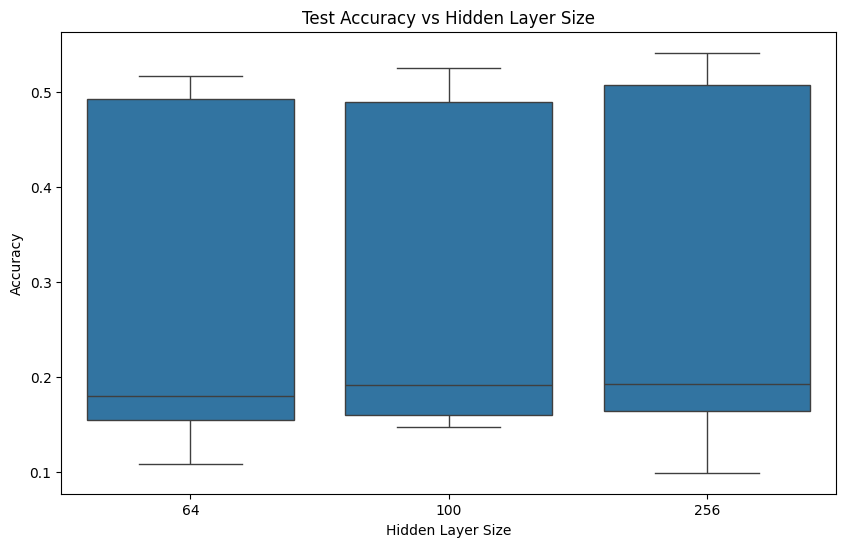

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hidden_size', y='test_accuracy', data=df)
plt.title("Test Accuracy vs Hidden Layer Size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy")
plt.show()

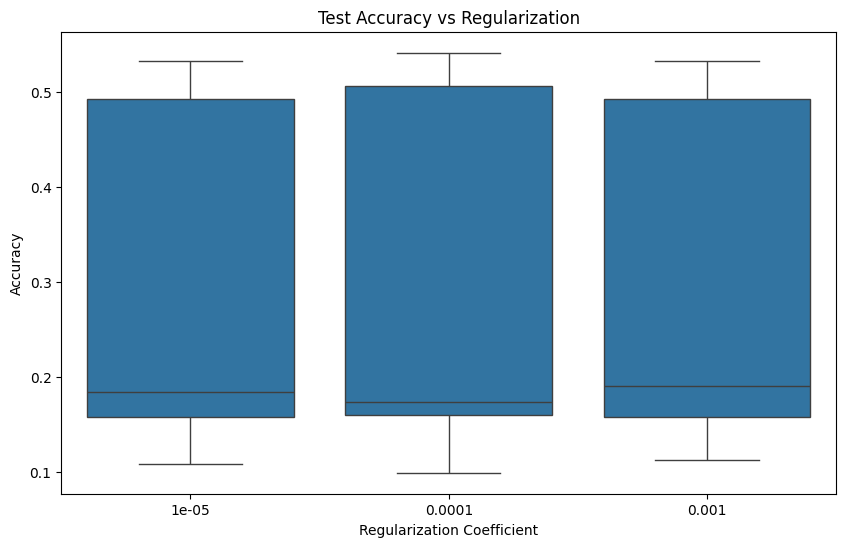

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reg', y='test_accuracy', data=df)
plt.title("Test Accuracy vs Regularization")
plt.xlabel("Regularization Coefficient")
plt.ylabel("Accuracy")
plt.show()

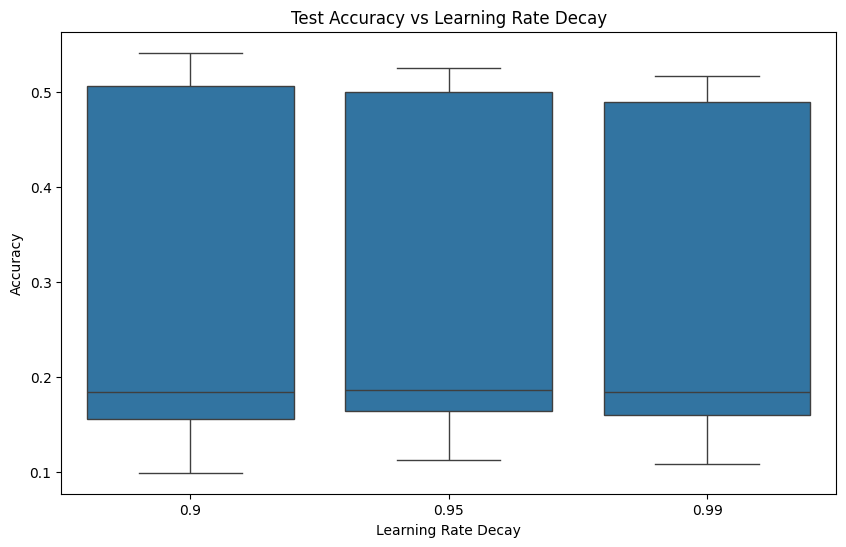

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='lr_decay', y='test_accuracy', data=df)
plt.title("Test Accuracy vs Learning Rate Decay")
plt.xlabel("Learning Rate Decay")
plt.ylabel("Accuracy")
plt.show()